# Recap 2020-04-07

![Keystone spill 2019](../resources/belle_fourche_1.jpg)

Image: Belle Fourche pipeline leak on Dec 05, 2016. https://bismarcktribune.com/news/state-and-regional/oil-spill-in-creek-originally-underestimated-making-it-one-of/article_93c58fa0-3d22-554c-a1ae-cfb08b248aee.html

1. Stronger focus on onshore spills
2. Inconsistent metrics
3. Different commodities - findings about progress
4. Data availability
5. Next steps - qualitative insights - oil spills
6. Developing empirical questions

## Setup

In [1]:
library(tidyverse)
library(oildata)

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
relevant_cols <- quo(-c(narrative, DATAFILE_AS_OF, CAUSE, cost, recovered))
head(select(incidents, !! relevant_cols))

significant,serious,incident_ID,ID,name,on_offshore,installation_year,cause,MAP_SUBCAUSE,fatalities,injuries,cost_1984,TOTAL_COST_CURRENT,commodity,volume,net_loss,year,date,long,lat
<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>
TRUE,FALSE,19860003,22907,Wyco Pipe Line,onshore,1966,excavation damage,THIRD PARTY EXCAVATION DAMAGE,0,0,53949.901,115187.287,rpp,1175,1171,1986,1986-01-05,NA,NA
TRUE,FALSE,19860005,18194,Seminole Pipeline,onshore,1982,all other causes,MISCELLANEOUS,0,0,1419.734,3031.244,ngl,50,50,1986,1986-01-12,NA,NA
TRUE,FALSE,19860027,12628,Mobil Pipeline,onshore,1963,corrosion,INTERNAL,0,0,0.000,0.000,crude,400,50,1986,1986-01-29,NA,NA
TRUE,FALSE,19860028,12628,Mobil Pipeline,onshore,1926,excavation damage,THIRD PARTY EXCAVATION DAMAGE,0,0,0.000,0.000,rpp,164,77,1986,1986-01-14,NA,NA
TRUE,FALSE,19860029,18273,Shell Pipe Line,onshore,1939,corrosion,EXTERNAL,0,0,0.000,0.000,crude,200,50,1986,1986-02-06,NA,NA
TRUE,FALSE,19860030,18273,Shell Pipe Line,onshore,1955,corrosion,INTERNAL,0,0,0.000,0.000,crude,3000,1,1986,1986-01-29,NA,NA


In [3]:
pipelines_y_c <- pipelines %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    group_by(year, commodity) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    mutate(cost_per_mile = incidents_cost/miles, 
           cost_per_volume = incidents_cost/estimate_volume_all, 
           volume_per_mile = incidents_volume/miles,
           volume_per_volume = incidents_volume/estimate_volume_all,
           inc_per_mile = incidents/miles, 
           inc_per_volume = incidents/estimate_volume_all,
           sign_inc_per_mile = significant_incidents/miles,
           sign_inc_per_volume = significant_incidents/estimate_volume_all) %>%
    pivot_longer(cols = -c(year, commodity), names_to = "variable", values_to = "value")

glimpse(pipelines_y_c)

Observations: 1,395
Variables: 4
Groups: year [15]
$ year      <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,…
$ commodity <chr> "crude", "crude", "crude", "crude", "crude", "crude", "crud…
$ variable  <chr> "hca", "miles", "volume_crude", "volume_hvl", "volume_rpp",…
$ value     <dbl> 1.754843e+04, 4.419932e+04, NA, NA, NA, NA, 1.803125e+12, 1…


## 1. Stronger focus on onshore

![Keystone spill 2019](../resources/keystone_1.jpg)

Image:Keystone pipeline leak on Oct 29, 2019. https://www.rawstory.com/2019/11/it-happens-over-and-over-and-over-and-over-keystone-pipeline-leaks-at-least-383000-gallons-of-crude-oil-in-north-dakota/

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/Oil_Siphon_%284885250078%29.jpg" alt="Kalamazoo River oil spill" style="width:45%"> 
Image: Kalamazoo River oil spill

In [4]:
packageVersion("oildata")

[1] ‘1.1.6’

In [5]:
head(pipelines)

year,commodity,ID,name,offshore_share,on_offshore,hca,miles,volume_crude,volume_hvl,⋯,estimate_volume_specific,incidents,significant_incidents,serious_incidents,incidents_volume,recovered,net_loss_volume,significant_incidents_volume,incidents_cost,significant_incidents_cost
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008,rpp,21359,Sasol North America,0,total,14,14,0,0,⋯,11719584,0,0,0,0.000000,0.0000000,0.000000,0,0.00,0
2008,rpp,21359,Sasol North America,0,offshore,0,0,0,0,⋯,0,0,0,0,0.000000,0.0000000,0.000000,0,0.00,0
2008,rpp,21359,Sasol North America,0,onshore,14,14,0,0,⋯,11719584,0,0,0,0.000000,0.0000000,0.000000,0,0.00,0
2008,rpp,31174,Shell Pipeline,0,total,316,552,0,0,⋯,10925453000,4,0,0,2.428571,0.1587302,2.269841,0,23072.57,0
2008,rpp,31174,Shell Pipeline,0,offshore,0,0,0,0,⋯,0,0,0,0,0.000000,0.0000000,0.000000,0,0.00,0
2008,rpp,31174,Shell Pipeline,0,onshore,316,552,0,0,⋯,10925453000,4,0,0,2.428571,0.1587302,2.269841,0,23072.57,0


## 2. Inconsistent metrics

In [6]:
crude_trends <- pipelines_y_c %>%
    filter(commodity == "crude") %>%
    filter(variable %in% c("significant_incidents", "incidents_volume", "net_loss_volume", 
                           "incidents_cost", "volume_per_volume", "volume_per_mile")) %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(commodity ~ variable, scale = "free") +
        geom_line() +
        scale_y_continuous(limits = c(0, NA)) +
        geom_smooth(method = "lm", se = T)

options(repr.plot.width=8, repr.plot.height=6)

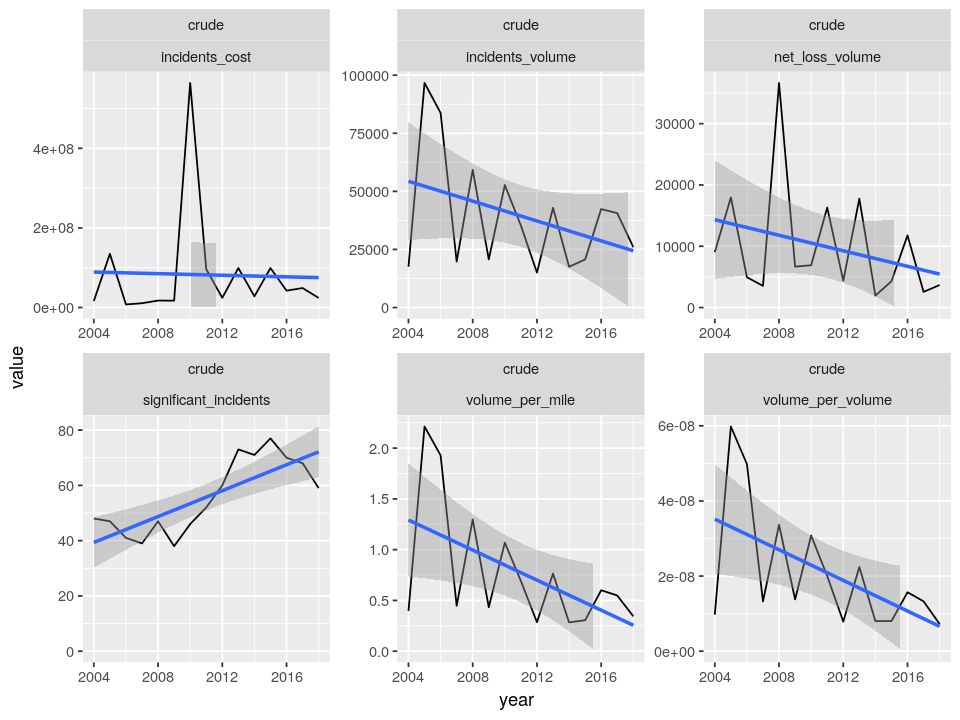

In [7]:
crude_trends

**There are trends that stand out in terms of one metric, but not in term of the other metrics.**

**Why is that?**

### The event in question

In [8]:
enbridge <- top_n(filter(incidents, commodity == "crude"), 1, cost_1984)
select(enbridge, !! relevant_cols)

significant,serious,incident_ID,ID,name,on_offshore,installation_year,cause,MAP_SUBCAUSE,fatalities,injuries,cost_1984,TOTAL_COST_CURRENT,commodity,volume,net_loss,year,date,long,lat
<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>
TRUE,FALSE,20100181,11169,Enbridge Energy,onshore,1969,material/weld/equip failure,ENVIRONMENTAL CRACKING-RELATED,0,0,460446182,983088852,crude,20082,1837,2010,2010-07-25,-84.97251,42.24329


---

**Note**

* Spill volume: ~20k barrels
* Net spill: only ~2k barrels
* *But* cost: almost 1b (in 1984 USD)

In [9]:
enbridge$narrative %>%
    DataAnalysisTools::jupyter_styling(font_size = 14)

x
"On july 26, 2010, enbridge confirmed a mainline rupture on line 6b at mp608.2452. During the investigation it was determined that the rupture occurred simultaneously with a scheduled pipeline shutdown. As a result of the incident phmsa issued a corrective action order that ordered the pipeline to remain shut down until such time that the activities outlined in the cao were satisfied. Enbridge satisfied all conditions of the cao and received approval from phmsa to resume operations on september 27, 2010 at which time enbridge successfully restarted the line. Of further note, while the telephonic report to the nrc is stated as 13:33 on july 26, 2010, enbridge made a call to nrc and was on hold for a period of time. Enbridge then hung up the call and called again at which time it was on hold for a further period of time. The stated 13:33 reflects the time that enbridge was able to provide verbal notification of the incident. The release was initially estimated at 19,500 barrels of which an undetermined amount entered the talmadge creek and ultimately the kalamazoo river. The amount of estimated product released in or reaching water has not yet been confirmed and is based upon a calculation provided by an external consultant. The amount of oil that reached water is subject to further investigation. Enbridge is currently reviewing several methodologies to calculate this volume, and will communicate the methodology and subsequent volume to phmsa upon completion. The section that failed has been sent to a laboratory for a metallurgical analysis, under the direction of ntsb. Pending the results of metallurgical testing and failure investigations, enbridge is unable to provide complete and final data for this original report submission. Information contained in this report is to be considered estimated until supplemental and final reports are filed. Ntsb, phmsa and enbridge investigations into this accident have commenced. As this investigation is ongoing, the primary and secondary cause(s) have not been finalized. To date, enbridge has not found any potable water sources (public or private) with drinking water contamination that has been verifiably linked to the enbridge release. The assessment of all drinking water sources in the affected area is ongoing. Enbridge is in the process of sampling drinking water sources and is working directly with state and local public health officials in evaluating drinking water from potable wells to ensure public health. Enbridge estimated that it will incur aggregate charges between $300 million and $400 million. These charges include emergency response, environmental remediation and cleanup activities associated with the crude oil release, costs to repair the pipeline and related inspection costs, potential claims by third parties, and lost revenue. We continue to work to accurately project the total cost of the leak and its remediation, however we are unable to break it down into the specific detail requested in this form due to the complexity of the efforts. As further information becomes known, supplemental reports will be filed as required. See attached uploaded file for supplemental narrative as of december 20, 2010. See attached uploaded file for supplemental narrative as of february 22, 2011. See attached uploaded file for supplemental narrative as of march 6, 2012. See attached uploaded file for supplemental narrative as of june 28, 2013."


---

**Note**

* Oil was spilled into water way, and quickly carried downstream
* Company recovered the oil from the water way, meaning by digging up the river bed

### For comparison - largest spill by volume

In [10]:
most_spilled <- top_n(filter(incidents, commodity != "hvl"), 1, volume)
select(most_spilled, !! relevant_cols)

significant,serious,incident_ID,ID,name,on_offshore,installation_year,cause,MAP_SUBCAUSE,fatalities,injuries,cost_1984,TOTAL_COST_CURRENT,commodity,volume,net_loss,year,date,long,lat
<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>
TRUE,TRUE,19860159,15490,Phillips Pipe Line,onshore,1939,all other causes,MISCELLANEOUS,0,26,473244.7,1010415,rpp,55000,NA,1986,1986-09-03,NA,NA


In [11]:
most_spilled$narrative

[1] "The floor of tank no. 805 failed spilling unlead motor fuel into the dike system. The area surrounding the terminal was evacuated due to gasoline odor. Productwas recovered using vacuum trucks and a terminal transfer pump. The community returned to their homes within 48 hours. All the product loss was due to evaporation. Insignificant product soaked into the ground."

---

**Clearly, volume recovered does not mean the same for these two incidents.**

* In the first incident the oil had to be dug up with the soil
* In the second incident, it could simply be recovered from a dike system

## 3. Findings about progress

In [12]:
trends <- pipelines_y_c %>%
    filter(variable %in% c("miles", "incidents_volume", "net_loss_volume", "incidents_cost")) %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(commodity ~ variable, scale = "free") +
        geom_line() +
        scale_y_continuous(limits = c(0, NA)) +
        geom_smooth(method = "lm", se = T)

options(repr.plot.width=8, repr.plot.height=6)

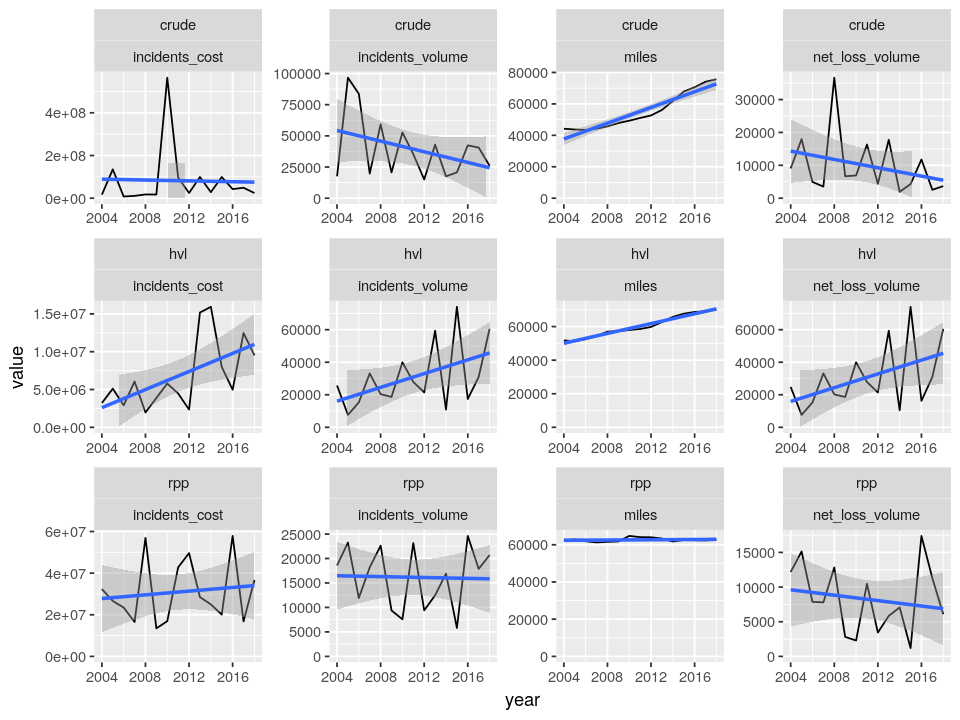

In [13]:
trends

---

**Takeaways**

* Clear downward trends exist only for crude
* For crude, the 2010 incidents did not lead to a change in trajectory

In [14]:
trends_standardized <- pipelines_y_c %>%
    filter(variable %in% c("volume_per_volume", "volume_per_mile", "cost_per_mile", "cost_per_volume")) %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(commodity ~ variable, scale = "free") +
        geom_line() +
        scale_y_continuous(limits = c(0, NA)) +
        geom_smooth(method = "lm", se = T)

options(repr.plot.width=8, repr.plot.height=6)

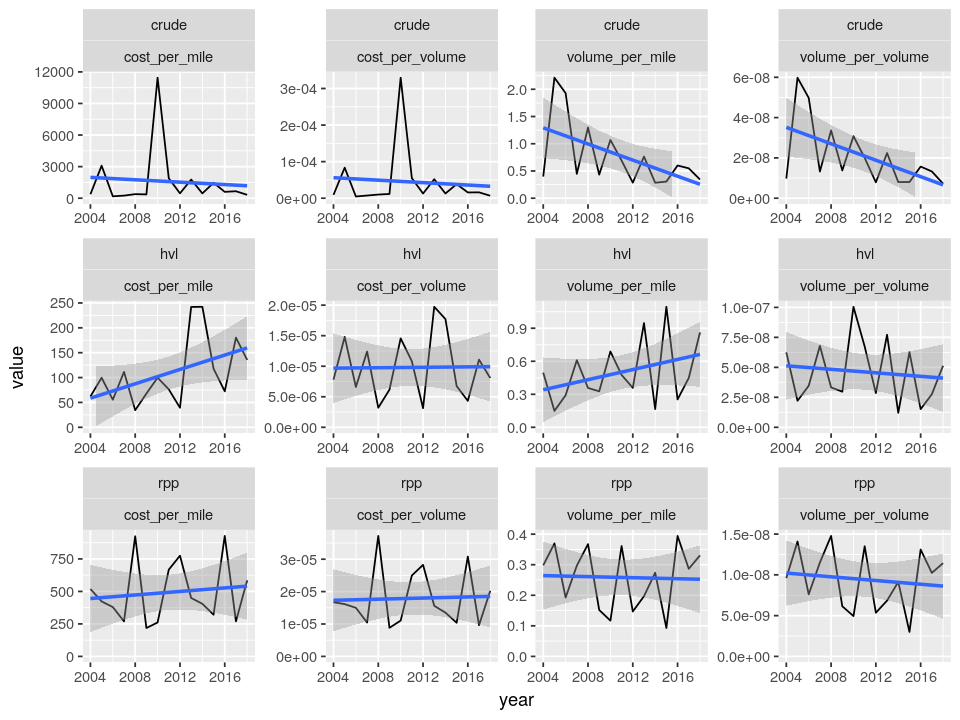

In [15]:
trends_standardized

---

Same as above - learning may only be evident for crude.

## 4. Data availability

### 1990s data graphed

In [16]:
pre <- readxl::read_excel("table_01_10.xls", skip = 1, na = "U", n_max=6)
pre$`...1` <- c("oil_total", "crude", "rpp", "gas_total", "gas_distribution", "hvl")

head(pre)

New names:
* `` -> ...1


...1,1960,1965,1970,1975,1980,1985,1990,1991,1992,⋯,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
oil_total,190944,210867,218671,225889,218393,213605,208752,203828,196545,⋯,178648,177463,176996,158248,160990,159889,163398,162832,162654,166921
crude,141085,149424,146275,145679,129831,117812,118805,115860,110651,⋯,87663,86369,85480,NA,NA,NA,NA,NA,NA,NA
rpp,49859,61443,72396,80210,88562,95793,89947,87968,85894,⋯,90985,91094,91516,NA,NA,NA,NA,NA,NA,NA
gas_total,630900,767500,913300,979300,1051800,1118900,1189200,1218200,1216100,⋯,1351200,1340300,1369300,1373500,1411400,1424200,1462300,1437500,1534300,1520200
gas_distribution,391400,494500,594800,648200,701800,753400,864600,891400,892000,⋯,1022100,1007500,1045600,1066300,1079600,1097900,1139800,1117800,1214000,1201100
hvl,183700,211300,252200,262600,266500,271200,292200,294100,291500,⋯,300100,301000,296600,287100,309500,304000,298900,296400,300400,300000


In [17]:
pre_2000 <- pivot_longer(pre, -`...1`)
colnames(pre_2000) <- c("commodity", "year", "miles")
pre_2000$year <- as.numeric(pre_2000$year)

incidents_y <- incidents %>%
    filter(commodity %in% c("crude", "rpp", "hvl")) %>%
    group_by(year, commodity) %>%
    summarize(spill_volume = sum(volume, na.rm = T), 
              net_loss = sum(net_loss, na.rm = T), 
              n_significant = sum(significant, na.rm = T), 
              cost = sum(cost_1984, na.rm = T))

pre_2000_trends <- left_join(pre_2000, incidents_y, by = c("year", "commodity"))

pre_2000_graphed <- pre_2000_trends %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    filter(!is.na(spill_volume & miles) & year < 2001) %>%
    pivot_longer(-c(year, commodity), names_to = "variable") %>%
    filter(variable != "n_significant") %>%
    ggplot(aes(x=year, value)) +
        facet_wrap(commodity ~ variable, scales = "free") +
        geom_line() + 
        geom_point(size = 0.7) +
        geom_smooth(method = "lm", se = T) +
        scale_y_continuous(limits = c(0, NA)) +
        scale_x_continuous(breaks = c(1990, 1992, 1994, 1996, 1998, 2000)) +
        labs(y = NULL)

options(repr.plot.width=8, repr.plot.height=6)

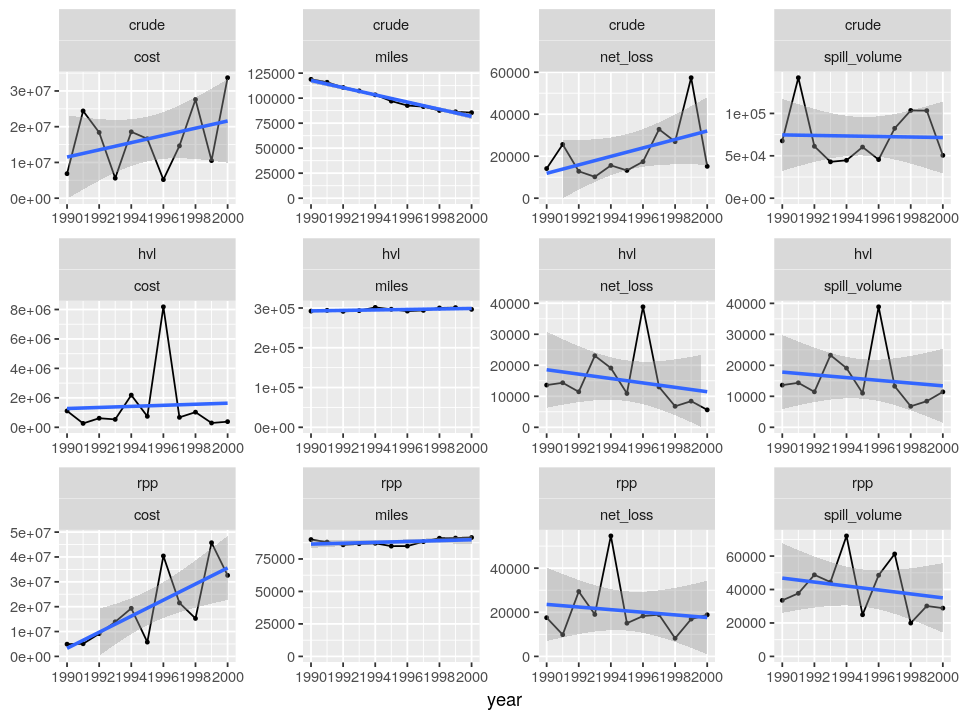

In [18]:
pre_2000_graphed

---

**What's the problem**

* Pre-2002 data available for incidents (starting 1986), not for pipeline network
* Data on pipeline network available from industry association (1960-2000; only pipeline miles)
* Methodology is different

## 5. Next steps - qualitative insights - oil spills

## 6. Developing empirical questions

### The problem at hand

* I am interested in the environmental impact
* But the numbers are not readily interpretable/comparable

---

Commonplace proble in research?

### In general

1. Progress as outcome of experience
2. Ownership
3. Progress as outcome of rare events/failure
4. Qualitative route - incident reports and (non-)progress